In [ ]:
from owslib.wfs import WebFeatureService
wfs11 = WebFeatureService(url='https://www.imis.bfs.de/ogc/opendata/ows', version='1.1.0')
wfs11.identification.title

In [ ]:
typeName1='opendata:nuklide_fisch'
typeName2='opendata:nuklide_fleisch'

In [ ]:
#multiple filter

import json
from owslib.fes import *
from owslib.etree import etree
import xml.dom.minidom 

filter1 = PropertyIsGreaterThanOrEqualTo(propertyname='sample_begin', literal='2021-09-01')
filter2 = PropertyIsLike(propertyname='nuclide', literal='Cs-134',wildCard='*')
filters3= PropertyIsLike(propertyname='local_authority', literal='Ulm',wildCard='*')
filters=[filter1,filter2,filters3]

filterxml = etree.tostring(And(operations=filters).toXML()).decode("utf-8")


response1 = wfs11.getfeature(typename=typeName1,filter = filterxml,outputFormat='application%2Fjson',maxfeatures=100)
# convert IO-byte to bytes
bytesD=bytes(response1.read())
# convert to json
data1 = json.loads(bytesD)

In [ ]:
# getting dataset1
import json
from owslib.fes import *
from owslib.etree import etree
import xml.dom.minidom 

filter = PropertyIsGreaterThanOrEqualTo(propertyname='sample_begin', literal='2021-09-01')
filterxml = etree.tostring(filter.toXML()).decode("utf-8")
response1 = wfs11.getfeature(typename=typeName1,filter = filterxml,outputFormat='application%2Fjson',maxfeatures=100)
# convert IO-byte to bytes
bytesD=bytes(response1.read())
# convert to json
data1 = json.loads(bytesD)

In [ ]:
# getting dataset2
import json

filter = PropertyIsGreaterThanOrEqualTo(propertyname='sample_begin', literal='2021-09-01')
filterxml = etree.tostring(filter.toXML()).decode("utf-8")
response2 = wfs11.getfeature(typename=typeName2,filter = filterxml,outputFormat='application%2Fjson',maxfeatures=100)
# convert IO-byte to bytes
bytesD=bytes(response2.read())
# convert to json
data2 = json.loads(bytesD)

In [ ]:
#save json to show in qgis
import json
with open(typeName1 + '.json', 'w', encoding='utf-8') as f:
    json.dump(data1, f, ensure_ascii=False, indent=4)

In [ ]:
#save json to show in qgis
import json
with open(typeName2 + '.json', 'w', encoding='utf-8') as f:
    json.dump(data2, f, ensure_ascii=False, indent=4)

In [45]:
import pandas as pd
#using pandas for serializing
df1= pd.json_normalize(data1,"features")
df2= pd.json_normalize(data2,"features")

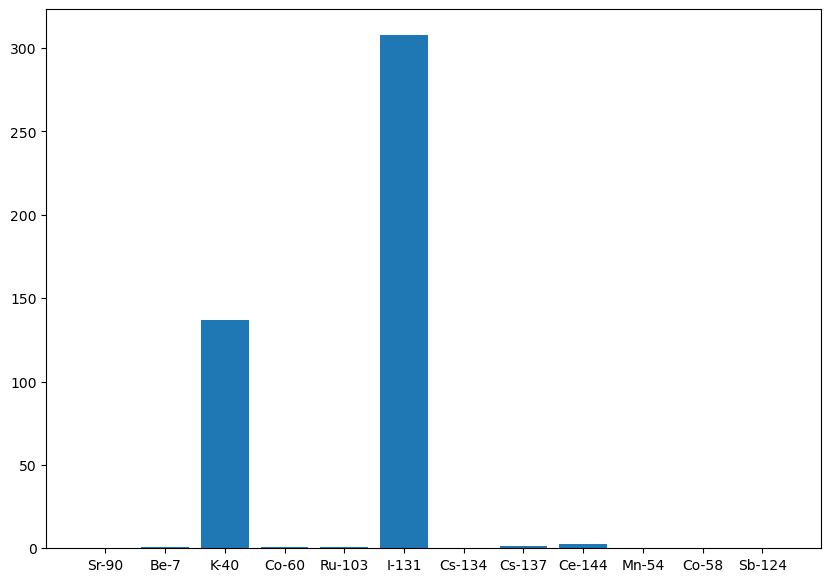

In [47]:
#bar plot dataset1

from matplotlib import pyplot as plt

nuclide = df1['properties.nuclide']
value = df1['properties.value']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(nuclide, value)
 
# Show Plot
plt.show()

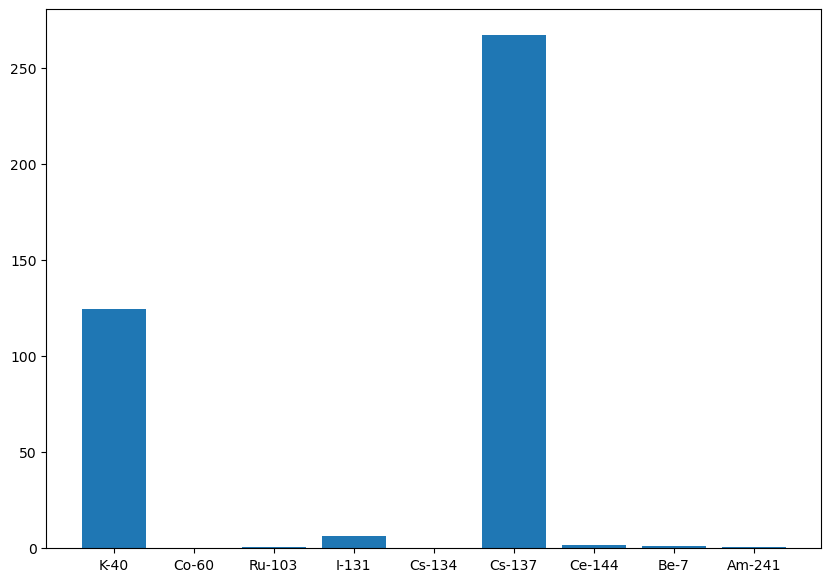

In [48]:
from matplotlib import pyplot as plt

nuclide = df2['properties.nuclide']
value = df2['properties.value']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(nuclide, value)
 
# Show Plot
plt.show()

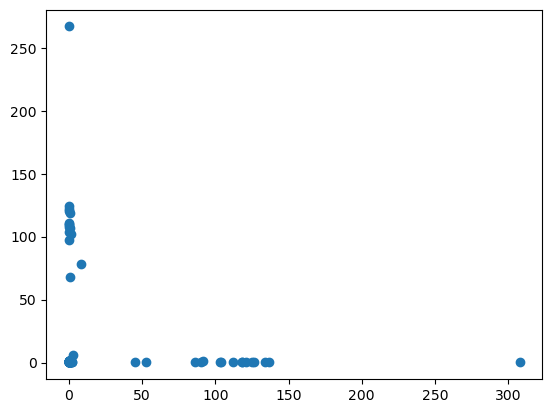

In [49]:
from matplotlib import pyplot as plt
import requests
import numpy as np

x= np.array(df1['properties.value'])
y=np.array(df2['properties.value'])


plt.scatter(x,y)
plt.show()

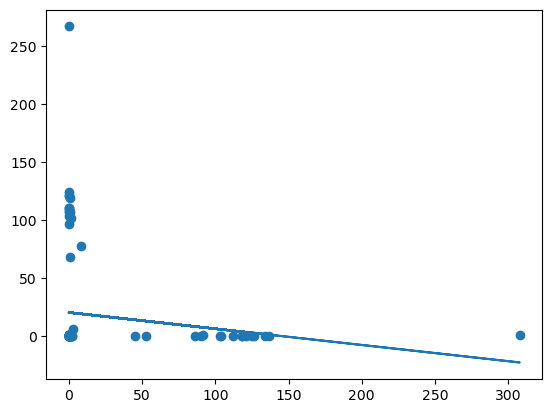

In [50]:
import matplotlib.pyplot as plt
from scipy import stats


slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [51]:
import sklearn 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape((-1, 1)), y)


LinearRegression()

In [52]:
model = LinearRegression().fit(x.reshape((-1, 1)), y)
r_sq = model.score(x.reshape((-1, 1)), y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.022757784614398036
